# 对名单预处理

In [96]:
#预处理名单
with open('all_upUID.txt', 'r') as f:
    all_up = f.readlines()
    
all_up2 = [i.strip('\n') for i in all_up ]    

import random
from random import choice


#设置种子使得每次抽样结果相同
random.seed(10)
all_up3= random.sample(all_up2, 300)  #从list中随机获取5个元素，作为一个片断返回  
len(all_up3)    

import pandas as pd

import csv
with open('UID100.csv', 'r',encoding='utf-8')as f:    
    baida_up = list(csv.reader(f))
baida_up2 = [i for i2 in baida_up for i in i2]#列表推导式
baida_up2.pop(0)
all_up4 = all_up3 + baida_up2
len(all_up4)

import numpy as np
all_up5 = list(set(all_up4))
len(all_up5)
column=['UID']  

upzhu=pd.DataFrame(columns=column,data=all_up5)

upzhu.to_csv('E:/upzhu.csv')

# 爬取up主主页相关数据

In [65]:

#根据名单进行数据爬取
import selenium.webdriver as wb  # 爬虫框架/自动化测试框架
import time  # 随机休眠，防止反爬机制
import numpy as np  # 处理数组用
import csv  # 处理数据，存储和读取CSV文件
import re  # 正则表达式


def init_csv(filepath='test.csv'):
    headers = ['UP昵称','会员等级', '会员类别', '关注', '粉丝', '获赞', '播放', '生日', '投稿']#最后文件的标题行
    with open(filepath, 'w', newline='', encoding='utf-8')as f:#w指直接写入
        f_csv = csv.writer(f)
        f_csv.writerow(headers)#创建文件，写入标题行


def write_csv(filepath, datas):
    with open(filepath, 'a+', newline='', encoding='utf-8')as f:#
        f_csv = csv.writer(f)
        f_csv.writerow(datas)#每爬取一行数据就写入


def read_uid(filepath):
    x = []
    with open(filepath, 'r', newline='', encoding='utf-8')as f:
        csv_read = csv.reader(f)
        for line in csv_read:
            line[0] = re.findall('\d+', line[0])[0]#正则化处理
            x.append(line[0])
    return x


class Spider(object):#定义一个爬虫类

    def __init__(self, display=True) -> None:
        super().__init__()
        option = wb.ChromeOptions()
        # 忽略driver自身的警告|错误等输出
        option.add_experimental_option(
            'excludeSwitches', ['enable-logging'])
        # 禁用图片加载,加速爬取url等页面数据,图片数据待爬取url后由requests库实现
        # option.add_experimental_option(
        #     'prefs', {"profile.managed_default_content_settings.images": 2})
        if display == False:
            option.headless = True
            print('程序运行，设置为无窗口模式')

        ################    Chrome程序地址改这里
        option.binary_location = r"C:\Program Files\Google\Chrome\Application\chrome.exe"
        # 浏览器驱动器初始化，需指明路径与参数
        ################    Chrome驱动器地址改这里，改try里的那个就行
        try:
            self.driver = wb.Chrome(
                r"D:\Chromedriver\chromedriver.exe", options=option)
        except:
            self.driver = wb.Chrome(
                r"C:\Users\Ludy_Lab\Desktop\workspace\assets\chromedriver.exe", options=option)

    def login(self):
        self.driver.get('https://space.bilibili.com/' + '51896064')
        self.random_sleep(2)
        login_elm = self.driver.find_element_by_css_selector(
            '#internationalHeader > div > div > div.nav-user-center > div.user-con.logout > div:nth-child(1) > div > span > div > span')
        #找到登陆按钮的元素
        login_elm.click()#要求点击
        wds = self.driver.window_handles#点击之后弹出到一个新的网页
        self.driver.switch_to.window(wds[-1])#返回到上一个网页
        self.random_sleep(2)
        username_elm: wb.remote.webdriver.WebElement = self.driver.find_element_by_css_selector(
            '#login-username')
        password_elm: wb.remote.webdriver.WebElement = self.driver.find_element_by_css_selector(
            '#login-passwd')
        login2_elm: wb.remote.webdriver.WebElement = self.driver.find_element_by_css_selector(
            '#geetest-wrap > div > div.btn-box > a.btn.btn-login')#登录界面的登陆按钮

        ################################
        # 账号密码改这里
        username_elm.send_keys('15029220381')#输入账号
        password_elm.send_keys('g123456')#输入密码
        self.random_sleep(1)
        login2_elm.click()
        # 8秒的时间进行人机结合登录=_=
        time.sleep(12)

    def random_sleep(self, delay=3):
        tmp = np.random.random()#随机数0-1
        time.sleep(delay * (tmp + 0.5))#每爬一个网页随机暂停几秒

    def fetch_by_UID(self, UID='51896064'):
        self.driver.get('https://space.bilibili.com/' + UID)
        self.random_sleep(3)

        up_name_elm = self.driver.find_element_by_css_selector('#h-name')
        print(up_name_elm.text)
        up_name = up_name_elm.text

        

        up_level_elm: wb.remote.webdriver.WebElement = self.driver.find_element_by_css_selector(
            '#app > div.h > div.wrapper > div.h-inner > div.h-user > div > div.h-basic > div:nth-child(1) > a.h-level.m-level')
        print(up_level_elm.get_attribute('lvl'))
        up_level = up_level_elm.get_attribute('lvl')

        up_member_elm = self.driver.find_element_by_css_selector(
            '#app > div.h > div.wrapper > div.h-inner > div.h-user > div > div.h-basic > div:nth-child(1) > a.h-vipType')
        print(up_member_elm.text)
        up_member = up_member_elm.text

        up_follow_elm = self.driver.find_element_by_css_selector('#n-gz')
        print(up_follow_elm.text)
        up_follow = up_follow_elm.text

        up_followby_elm = self.driver.find_element_by_css_selector('#n-fs')
        print(up_followby_elm.text)
        up_followby = up_followby_elm.text

        up_getzan_elm = self.driver.find_element_by_css_selector('#n-bf')
        print(up_getzan_elm.text)
        up_getzan = up_getzan_elm.text

        up_numofplay_elm = self.driver.find_element_by_xpath(
            '/html/body/div[2]/div[2]/div/div[1]/div[3]/div[2]/p[2]')
        print(up_numofplay_elm.text)
        up_numofplay = up_numofplay_elm.text

        birthday = 'None'
        try:
            birthday = self.driver.find_element_by_css_selector(
                '#page-index > div.col-2 > div.section.user > div.info > div.content > div > div > div.item.birthday > span.text').text
        except:
            pass
        print(birthday)

        up_tougao_elm = self.driver.find_element_by_css_selector(
            '#navigator > div > div.n-inner.clearfix > div.n-tab-links > a.n-btn.n-video.n-audio.n-article.n-album > span.n-num').text
        tougao = up_tougao_elm
        xiangbu = 'Error'
        try:
            up_tougao_elm = self.driver.find_element_by_xpath(
                '//*[@id="navigator"]/div/div[1]/div[1]/a[3]/span[2]')
            up_tougao_elm.click()
            self.random_sleep(3)
            up_xiangbu_elm = self.driver.find_element_by_css_selector(
                '#page-video > div > div.contribution-sidenav > div > div > ul > li:nth-child(4) > span')
            xiangbu = up_xiangbu_elm.text
        except:
            pass
        if xiangbu != 'Error':
            tougao = str(int(tougao) - int(xiangbu))
        print(tougao)
        self.random_sleep(2)
        
        
        
        return (up_name,up_level, up_member, up_follow, up_followby, up_getzan, up_numofplay, birthday, tougao)


if __name__ == "__main__":#从此开始执行
    # 用来保存爬虫结果的文件是下面这个，可以不新建
    csv_path = r'.\bilibli_ups2.csv'
    # 用来读取UID列表的csv文件是这个，excel要先另存为成csv，并且不要有标题行
    uid_path = r'.\upzhu.csv'
    uid_list = read_uid(uid_path)#返回成一个列表
    worker = Spider(display=True)#spider是前面定义的一个爬虫类
    try:
        worker.login()
    except:
        print('登录失败')
        time.sleep(10)
        exit()

    try:
        init_csv(csv_path)#执行初始化CSV的函数
    except:
        pass

    for i in range(len(uid_list)):
        try:
            write_csv(csv_path, worker.fetch_by_UID(uid_list[i]))
            print('*' * 20 + '\n', i, 'success')
        except:
            print(i, 'error')
    time.sleep(10)
    # worker.random_sleep()

果厨果厨果
6
年度大会员
46
14万
569.6万
1.1亿
02-06
0 error
真鱼
6
年度大会员
23
51.6万
171万
3.7亿
09-29
619
********************
 1 success
泠鸢yousa
6
年度大会员
175
277.2万
821.9万
9058.6万
05-19
328
********************
 2 success
老蒋巨靠谱
6
年度大会员
1030
67万
135.7万
1285.7万
01-06
69
********************
 3 success
请叫我王胖子
6
年度大会员
99
75.5万
39万
4447万
None
164
********************
 4 success
pcyxjy
6
年度大会员
34
76.2万
1811.9万
7.4亿
05-31
5 error
傲娇少年_Vk
6
年度大会员
18
35.9万
27.3万
496.4万
None
40
********************
 6 success
中国BOY超级大猩猩
6
年度大会员
68
681.5万
4578.9万
11.3亿
06-02
7 error
神叨字幕组
6

1
48.3万
52.6万
5285.7万
03-26
4
********************
 8 success
盗月社食遇记
6
年度大会员
416
452.5万
2791.6万
5.1亿
04-09
389
********************
 9 success
洛温阿特金森
6
年度大会员
411
66.1万
659.1万
7717.9万
01-01
35
********************
 10 success
朱亚文
6
年度大会员
11
54.9万
143.5万
1261.7万
None
16
********************
 11 success
马戏糍
6
年度大会员
177
74万
211.3万
4068.8万
None
108
********************
 12 success
小豆蔻儿
6
年度大会员
3
110.8万
326.5万
6213.2万
01-02
323
********************
 

# 爬取完成后进行数据清洗

In [14]:
#对爬取的数据进行描述性分析
import pandas as pd

In [15]:
shuju=pd.read_csv('bilibli_ups2.csv')

In [6]:
shuju['百大']=0

In [21]:
shuju.describe()

,dengji,guanzhu,tougao,baida
count,329.000000,329.000000,329.000000,329.0
mean,5.960486,122.683891,194.969605,0.0
std,0.407574,161.428126,160.269663,0.0
min,0.000000,0.000000,0.000000,0.0
25%,6.000000,27.000000,91.000000,0.0
50%,6.000000,75.000000,142.000000,0.0
75%,6.000000,161.000000,251.000000,0.0
max,6.000000,1279.000000,916.000000,0.0


In [17]:
#进行数据清洗

shuju.columns=['name','dengji','huiyuan','guanzhu','fensi','zan','bofang','birth','tougao']

In [20]:
shuju['fensi']

0       51.6万
1      277.2万
2         67万
3       75.5万
4       35.9万
        ...  
324       85万
325     37.8万
326    341.9万
327    169.6万
328    168.3万
Name: fensi, Length: 329, dtype: object

In [23]:
shuju.isnull().sum()

name        0
dengji      0
huiyuan    88
guanzhu     0
fensi       0
zan         0
bofang      0
birth       0
tougao      0
baida       0
dtype: int64

In [27]:
shuju.fillna('非会员',inplace=True)


,name,dengji,huiyuan,guanzhu,fensi,zan,bofang,birth,tougao,baida
0,真鱼,6,年度大会员,23,51.6万,171万,3.7亿,09-29,619,0
1,泠鸢yousa,6,年度大会员,175,277.2万,821.9万,9058.6万,05-19,328,0
2,老蒋巨靠谱,6,年度大会员,1030,67万,135.7万,1285.7万,01-06,69,0
3,请叫我王胖子,6,年度大会员,99,75.5万,39万,4447万,None,164,0
4,傲娇少年_Vk,6,年度大会员,18,35.9万,27.3万,496.4万,None,40,0
...,...,...,...,...,...,...,...,...,...,...
324,冷水煮乐器,6,年度大会员,116,85万,147.8万,2924.5万,None,123,0
325,FLAY工作室,6,年度大会员,86,37.8万,46.8万,4162.1万,08-26,186,0
326,=咬人猫=,6,年度大会员,31,341.9万,714.8万,2.9亿,None,110,0
327,逗川kshadow,6,年度大会员,56,169.6万,515.5万,1.7亿,08-23,249,0


In [31]:
shuju.isnull().sum()



name       0
dengji     0
huiyuan    0
guanzhu    0
fensi      0
zan        0
bofang     0
birth      0
tougao     0
baida      0
dtype: int64

In [58]:
baida=open("2020up100.txt", encoding="utf-8", errors='ignore').read()


In [70]:
f = open(r'2020up100.txt',encoding = "utf-8")
a = list(f)
f.close()

In [71]:
b=[i.strip() for i in a]
print(b)

['啊吗粽', '阿幕降临', '敖厂长', '拜托了小翔哥', '宝剑嫂', '毕导THU', '不正经老丝', '才疏学浅的才浅', '-纯黑-', '大祥哥来了', '盗月社食遇记', '电影最TOP', '东尼ookii', '逗比的雀巢', 'EdmundDZhang', '阿斗归来了', '二喵的饭', '泛式', '芳斯塔芙', '冯提莫', '孤独的美食基', 'hanser', '韩小四April', '盒子酸奶', '鹤吱菌', '黄龄', '黑猫厨房', '红色激情', '花少北丶', '回形针PaperClip', '机智的党妹', '极速拍档', '假美食po主', '敬汉卿', '卡特亚', '靠脸吃饭的徐大王', '靠谱电竞', '科技美学', '克里米亚野生动物园', 'LexBurner', '蜡笔和小勋', '老番茄', '老师好我叫何同学', '老坛胡说', '力元君', '历史调研室', '凉风Kaze', '泠鸢yousa', '刘老师说电影', '罗汉解说', '罗翔说刑法', '★⑥檤轮囬★', '猛男舞团IconX', '绵羊料理', '某幻君', '木鱼水心', '纳豆奶奶', '奶糕成精档案社', '努力的Lorre', '女胖胖', '哦呼w', '帕梅拉PamelaReif', '瓶子君152', '齐天大肾余潇洒', '奇闻观察室', '枪弹轨迹', '上海滩许Van强', '沈逸老师', '渗透之C君', '食贫道', '水无月菌', '特效小哥studio', '兔叭咯', '推背兔の', '丸子叨叨叨', '文不叮', '文西与阿漆', '我是郭杰瑞', '逍遥散人', '小艾大叔', '小潮院长', '小片片说大片', '-欣小萌-', '徐大虾咯', '=咬人猫=', '一只小仙若', '伊丽莎白鼠', '音乐制作人Kurt', '影视飓风', '硬核的半佛仙人', '与山0v0', '雨哥到处跑', '远古时代装机猿', 'zettaranc', '在下哲别', '智能路障', '中国BOY超级大猩猩', '周六野Zoey', '主厨农国栋', '祖娅纳惜']


In [79]:
shuju.baida=0

In [93]:
for i in range(len(shuju)):  
          if shuju.name[i] in b:  
               shuju.baida[i]=='1'  
          else: shuju.baida[i]=='0'  #给百大设置一个指标


In [101]:
a=shuju.baida
print(a)
a=list(a)
a.count(1)

0      0
1      1
2      0
3      0
4      0
      ..
324    0
325    0
326    1
327    0
328    0
Name: baida, Length: 329, dtype: int64


50

In [102]:
shuju.columns

Index(['name', 'dengji', 'huiyuan', 'guanzhu', 'fensi', 'zan', 'bofang',
       'birth', 'tougao', 'baida'],
      dtype='object')

In [106]:
shuju['guanzhu']=shuju['guanzhu'].str.replace('万','')
shuju

,name,dengji,huiyuan,guanzhu,fensi,zan,bofang,birth,tougao,baida
0,真鱼,6,年度大会员,23,51.6万,171万,3.7亿,09-29,619,0
1,泠鸢yousa,6,年度大会员,175,277.2万,821.9万,9058.6万,05-19,328,1
2,老蒋巨靠谱,6,年度大会员,1030,67万,135.7万,1285.7万,01-06,69,0
3,请叫我王胖子,6,年度大会员,99,75.5万,39万,4447万,None,164,0
4,傲娇少年_Vk,6,年度大会员,18,35.9万,27.3万,496.4万,None,40,0
...,...,...,...,...,...,...,...,...,...,...
324,冷水煮乐器,6,年度大会员,116,85万,147.8万,2924.5万,None,123,0
325,FLAY工作室,6,年度大会员,86,37.8万,46.8万,4162.1万,08-26,186,0
326,=咬人猫=,6,年度大会员,31,341.9万,714.8万,2.9亿,None,110,1
327,逗川kshadow,6,年度大会员,56,169.6万,515.5万,1.7亿,08-23,249,0


In [108]:
shuju['zan']=shuju['fensi'].str.replace('万','')

In [110]:
shuju['bofang']=shuju['bofang'].str.replace('万','')

In [112]:
shuju['bofang']=shuju['bofang'].str.replace('亿','*10000')

In [134]:
float(shuju.bofang[0].replace('*10000',''))*10000

37000.0

In [172]:
for i in range(0,len(shuju)):
    if shuju.bofang[i][-6:] == "*10000":
        temp=float(shuju.bofang[i].replace('*10000','')) * 10000
        print(temp)

3.7


In [178]:
shuju.birth=shuju.birth.replace('None', '未设置')

In [180]:
shuju.birth[0][0:2]

'09'

In [188]:
shuju#全部以万为单位

for i in range(0,len(shuju)):
    if shuju.birth[i] != None:
        tem=shuju.birth[i][0:2]
        print(tem)
        shuju.birth[i]=tem
for i in range(0,len(shuju)):
    if shuju.birth[i] != '未设':
        tem=float(shuju.birth[i][0:2])
        shuju.birth[i]=float(tem)           

10

In [ ]:
for i in range(0,len(shuju)):
    tem=float(shuju.guanzhu[i])
    shuju.guanzhu[i]=float(tem) 
    
for i in range(0,len(shuju)):
    tem2=float(shuju.fensi[i])
    shuju.fensi[i]=float(tem2) 
    
for i in range(0,len(shuju)):
    tem3=float(shuju.zan[i])
    shuju.zan[i]=float(tem3)     
    
for i in range(0,len(shuju)):
    tem4=float(shuju.bofang[i])
    shuju.bofang[i]=float(tem4)       
    
    

In [195]:
shuju

,name,dengji,huiyuan,guanzhu,fensi,zan,bofang,birth,tougao,baida
0,真鱼,6,年度大会员,23,51.6,171,37000,9,619,0
1,泠鸢yousa,6,年度大会员,175,277.2,821.9,9058.6,5,328,1
2,老蒋巨靠谱,6,年度大会员,1030,67,135.7,1285.7,1,69,0
3,请叫我王胖子,6,年度大会员,99,75.5,39,4447,未设,164,0
4,傲娇少年_Vk,6,年度大会员,18,35.9,27.3,496.4,未设,40,0
...,...,...,...,...,...,...,...,...,...,...
324,冷水煮乐器,6,年度大会员,116,85,147.8,2924.5,未设,123,0
325,FLAY工作室,6,年度大会员,86,37.8,46.8,4162.1,8,186,0
326,=咬人猫=,6,年度大会员,31,341.9,714.8,29000,未设,110,1
327,逗川kshadow,6,年度大会员,56,169.6,515.5,17000,8,249,0


# 开始进行可视化分析

In [196]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


<AxesSubplot:xlabel='tougao', ylabel='Count'>

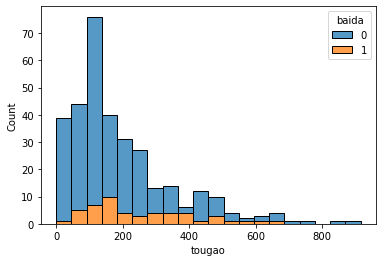

In [199]:
sns.histplot(data=shuju,x="tougao", hue="baida",multiple="stack")

<AxesSubplot:xlabel='tougao', ylabel='Density'>

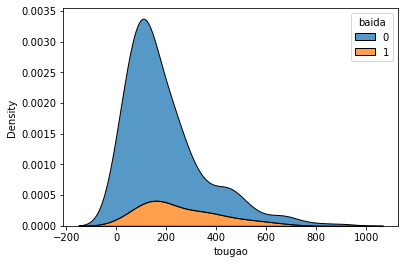

In [200]:
sns.kdeplot(data=shuju,x="tougao", hue="baida",multiple="stack")

In [203]:
shuju.columns

Index(['name', 'dengji', 'huiyuan', 'guanzhu', 'fensi', 'zan', 'bofang',
       'birth', 'tougao', 'baida'],
      dtype='object')

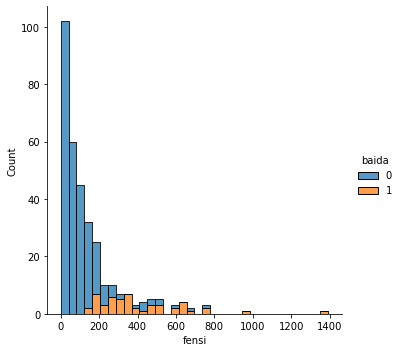

In [210]:
sns.displot(data=shuju,x="fensitbi",hue="baida",multiple="stack")

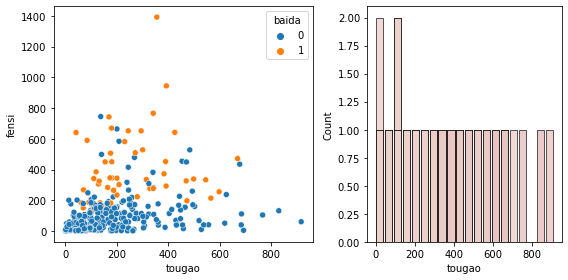

In [216]:
f,axs=plt.subplots(1,2,figsize=(8,4),gridspec_kw=dict(width_ratios=[4,3]))#每个参数的意义

sns.scatterplot(data=shuju,x='tougao',y='fensi',hue='baida',ax=axs[0])

sns.histplot(data=shuju, x="tougao", hue="fensi", shrink=.8, alpha=.8, legend=False, ax=axs[1])

f.tight_layout()

In [219]:
shuju['birth'] = shuju['birth'].apply(str)

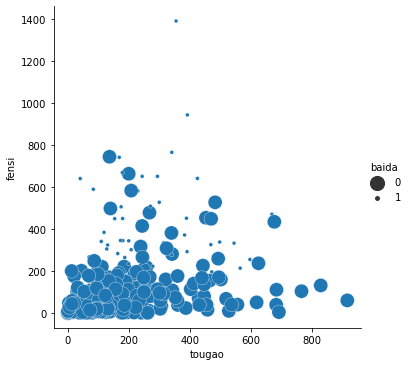

In [224]:
sns.relplot(x='tougao',y='fensi',size='baida',sizes=(15,200),data=shuju)

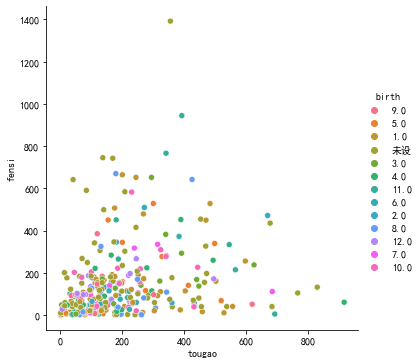

In [230]:
from pylab import *
mpl.rcParams['font.sans-serif'] = ['Droid Sans Fallback']
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False 
sns.relplot(x='tougao',y='fensi',hue='birth',sizes=(15,200),data=shuju)

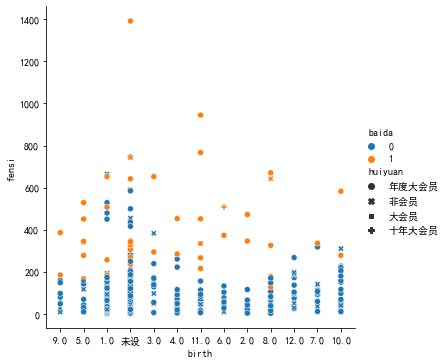

In [231]:
sns.relplot(x='birth',y='fensi',hue='baida',style='huiyuan',sizes=(15,200),data=shuju)

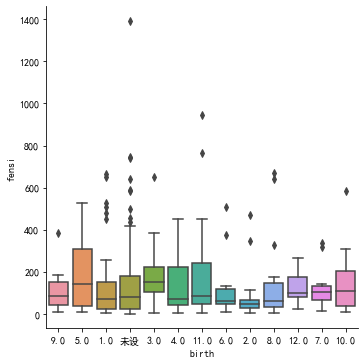

In [234]:
sns.catplot(x='birth',y='fensi',kind='box',data=shuju)

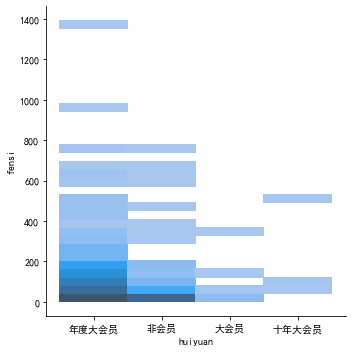

In [241]:
sns.displot(x='huiyuan',y='fensi',data=shuju)

# 对up主的名字做词云分析

In [253]:
#获得百大的up主


In [6]:
from wordcloud import WordCloud
import jieba
import matplotlib.pyplot as plt


In [32]:
filename="2020up100.txt"
with open(filename,'r',encoding='utf-8')as f:
    mytext=f.read()
    stopwords={}.fromkeys(f.read().split("\n"))   
    segs=jieba.cut(mytext)
    mytextcn=" ".join(jieba.cut(mytext))
    

Populating the interactive namespace from numpy and matplotlib


(-0.5, 1399.5, 999.5, -0.5)

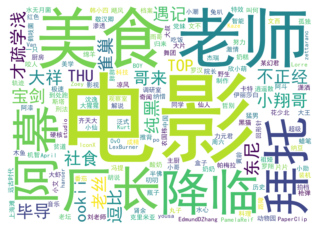

In [33]:

mytext_list=[]
for seg in segs:
    if seg not in stopwords and seg!=" " and len(seg)!=1:
        mytext_list.append(seg.replace(" ",""))
cloud_text=" ".join(mytext_list) #去掉长度为1的词

wordcloud= WordCloud(width=1400,height=1000,font_step=50,font_path="simhei.ttf",background_color='white').generate(cloud_text)
%pylab inline  
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')

In [25]:
f=shuju.name
f


0             真鱼
1        泠鸢yousa
2          老蒋巨靠谱
3         请叫我王胖子
4        傲娇少年_Vk
         ...    
324        冷水煮乐器
325      FLAY工作室
326        =咬人猫=
327    逗川kshadow
328     KBShinya
Name: name, Length: 329, dtype: object

In [28]:
all_name = open("all_name.txt", "w",encoding='utf-8')

for i in range(0,len(f)):
    s=str(f[i])
    all_name.write(s)

all_name.close()

In [44]:
#下面对随机抽取的三百名up主的名字作词云

filename="all_name.txt"
with open(filename,'r',encoding='utf-8')as f:
    mytext=f.read()
    stopwords={}.fromkeys(f.read().split("\n"))   
    segs=jieba.cut(mytext)
    mytextcn=" ".join(jieba.cut(mytext))
    

Populating the interactive namespace from numpy and matplotlib


(-0.5, 1999.5, 1999.5, -0.5)

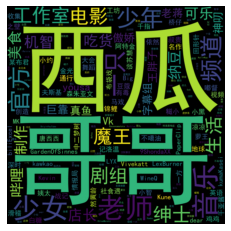

In [45]:
mytext_list=[]
for seg in segs:
    if seg not in stopwords and seg!=" " and len(seg)!=1:
        mytext_list.append(seg.replace(" ",""))
cloud_text=" ".join(mytext_list) #去掉长度为1的词

wordcloud= WordCloud(width=2000,height=2000,font_step=40,font_path="simhei.ttf",background_color='black').generate(cloud_text)
%pylab inline  
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')